# Importing data and fitting model

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['HP'] = pd.Series(boston_pd_target)

In [19]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [20]:
# input
X = boston_pd.iloc[:, :-1]
 
#output
Y = boston_pd.iloc[:, -1]
 
print(boston_pd.head())

import statsmodels.api as sm

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(Y, X)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT    HP  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
                            OLS Regression Results                            
Dep. Variable:                     HP   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 31 Mar 2022   P

# Checking 1st Assumptions  — Linear relatioship

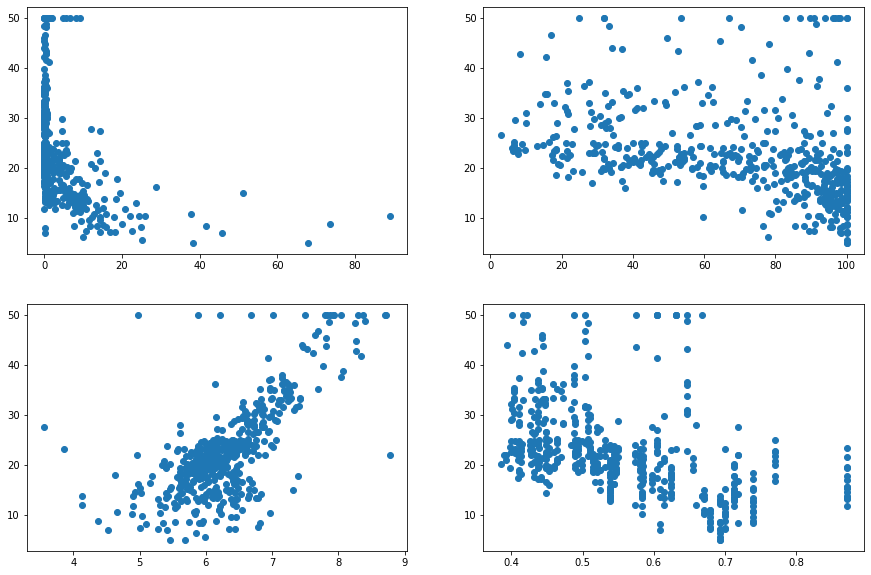

In [21]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['CRIM'], Y)            
ax2.scatter(X['AGE'], Y)
ax3.scatter(X['RM'], Y)
ax4.scatter(X['NOX'], Y)
plt.show()

# Checking 2nd Assumptions  — No or little Multicollinearity

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'CRIM': 1.7921915474332413,
 'ZN': 2.298758178749441,
 'INDUS': 3.9915964183460333,
 'CHAS': 1.0739953275537883,
 'NOX': 4.393719847577495,
 'RM': 1.9337444357832558,
 'AGE': 3.1008255128153364,
 'DIS': 3.9559449063727263,
 'RAD': 7.484496335274478,
 'TAX': 9.00855394759707,
 'PTRATIO': 1.7990840492488978,
 'B': 1.3485210764063755,
 'LSTAT': 2.9414910780919366}

# Checking 3rd Assumptions - Homoscedasticity - constant variance

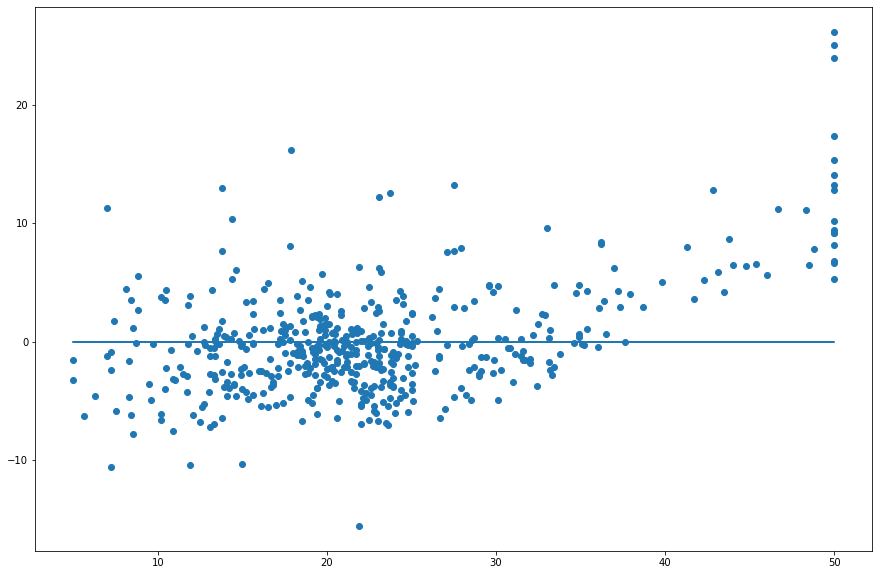

In [23]:

residuals = result.resid
plt.scatter(Y, residuals)
plt.plot(Y, [0]*len(Y))

# Checking 4th Assumption - No Autocorrelation of errors

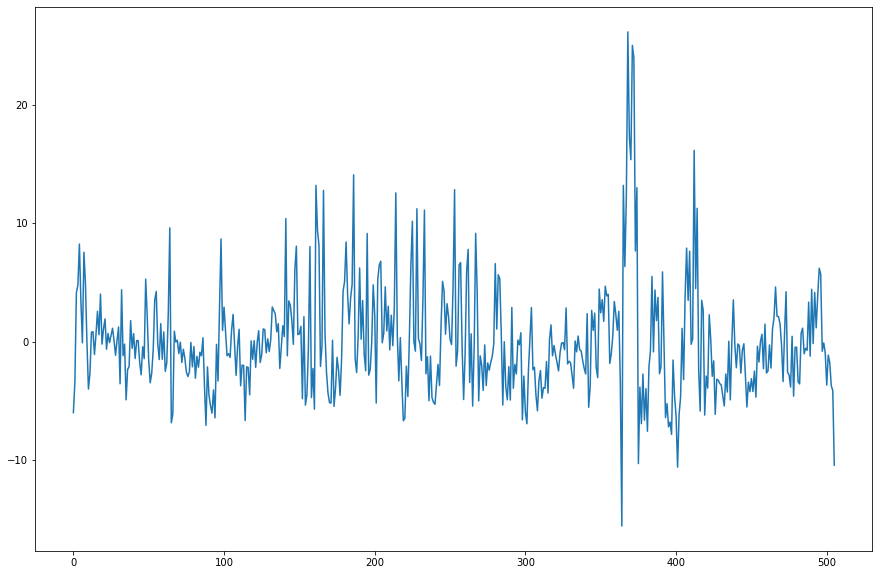

In [24]:
plt.plot(residuals.index, residuals)

# Checking 5th Assumptions - Residual Normality

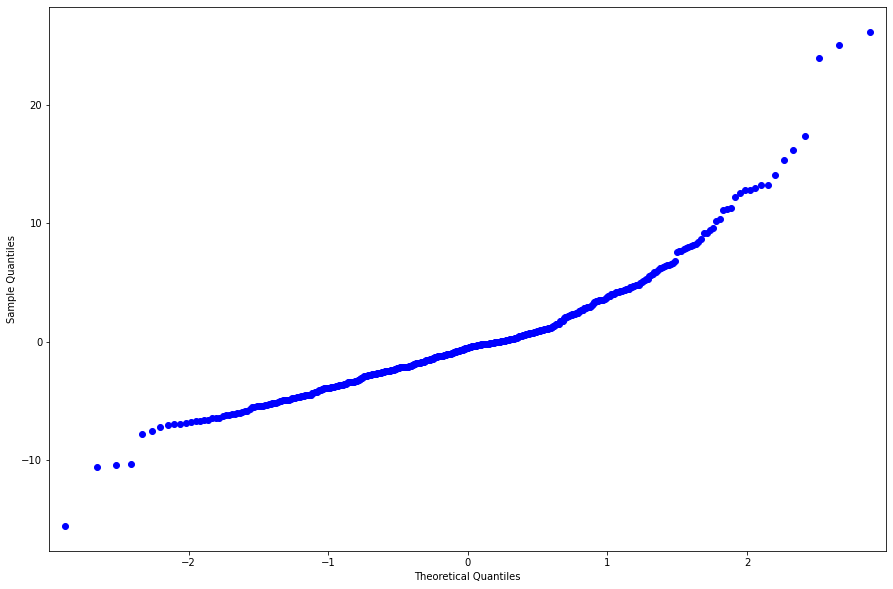

In [25]:
residuals = result.resid
sm.qqplot(residuals)
plt.show()


In [27]:
np.mean(residuals)

1.2634601314232215e-14

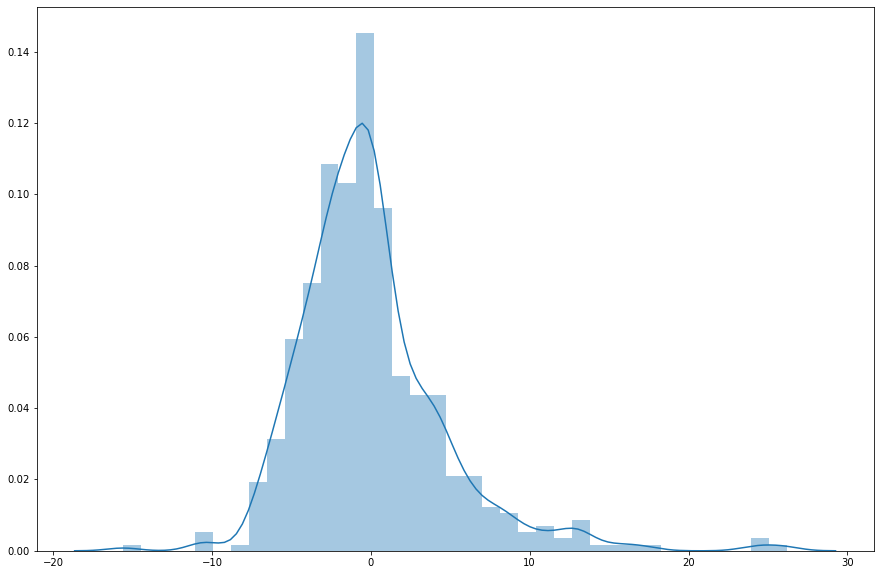

In [26]:
import seaborn as sns
sns.distplot(residuals)

# Checking 6th Assumptions - Independence of observations

# Looking at the data - ways to collect etc

# Checking 7th Assumptions - Residual relation with independent vatiables

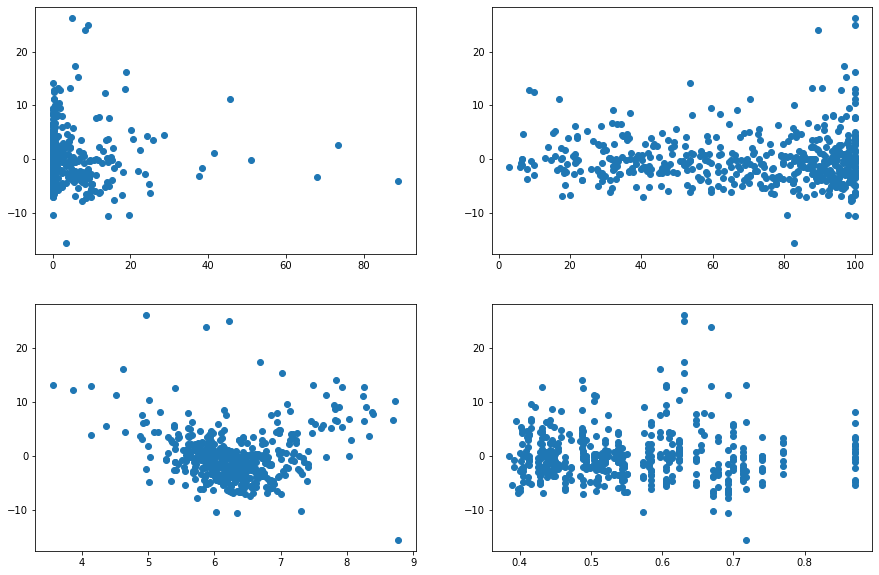

In [28]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['CRIM'], residuals)            
ax2.scatter(X['AGE'], residuals)
ax3.scatter(X['RM'], residuals)
ax4.scatter(X['NOX'], residuals)
plt.show()
